In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
adventure_works_df = pd.ExcelFile('D:\\daneshkar\\HW-L03-02-statistics\\Adventure Works 2020.xlsx')

In [2]:
sales_df = adventure_works_df.parse('Sales')
sales_2018_df = sales_df[sales_df['OrderDate'].dt.year == 2018]
product_df = adventure_works_df.parse('Products')

merged_df = pd.merge(sales_2018_df, product_df, how = 'left' , on = 'ProductKey')

merged_df[['ProductKey', 'ProductName', 'OrderDate', 'OrderQuantity']].head()

,ProductKey,ProductName,OrderDate,OrderQuantity
0,352,"Mountain-200 Silver, 38",2018-01-01,1
1,385,"Road-550-W Yellow, 42",2018-01-01,1
2,327,"Road-650 Red, 44",2018-01-01,1
3,375,"Road-250 Black, 48",2018-01-01,1
4,375,"Road-250 Black, 48",2018-01-01,1


In [3]:
groupby_df = merged_df.groupby(['ProductKey' , 'ProductName'])['OrderQuantity'].count().reset_index().sort_values(by = 'OrderQuantity' , ascending= False)

groupby_df = groupby_df[['ProductName' ,'OrderQuantity' ]].head(10)

groupby_df.head()

,ProductName,OrderQuantity
64,Water Bottle - 30 oz.,1742
67,Patch Kit/8 Patches,1356
79,Mountain Tire Tube,1313
80,Road Tire Tube,999
0,"Sport-100 Helmet, Red",898


<Axes: xlabel='OrderQuantity', ylabel='ProductName'>

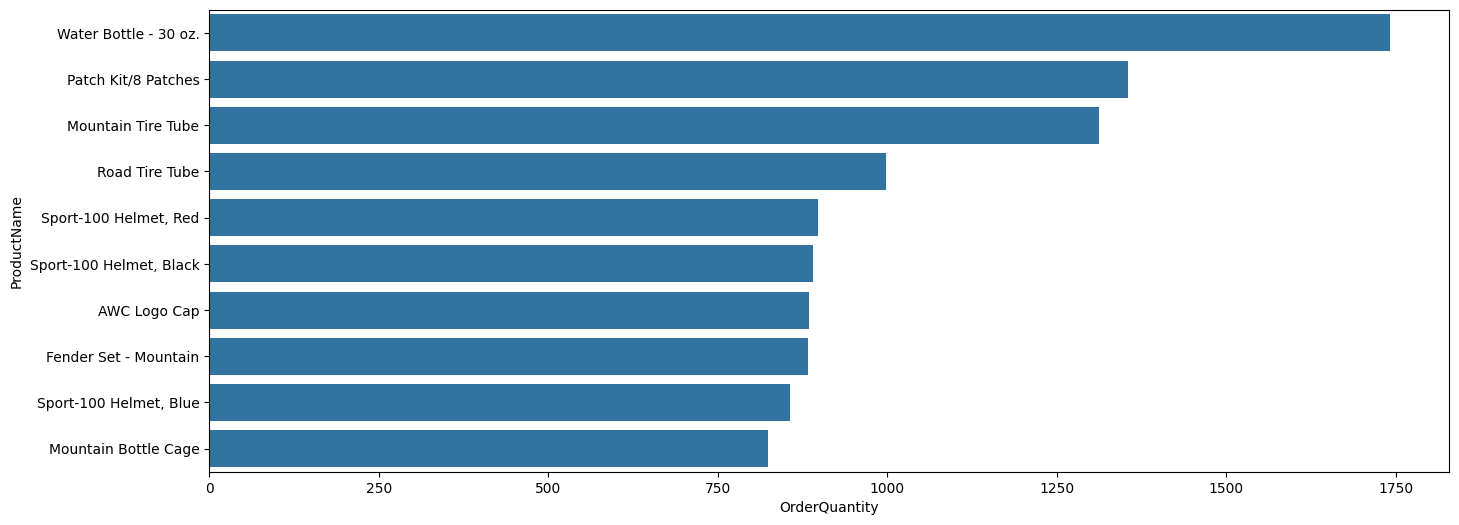

In [4]:
plt.figure(figsize = (16, 6))

sb.barplot(data = groupby_df , x = 'OrderQuantity' , y = 'ProductName')